In [1]:
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as sp
import pandas
import torch
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

In [2]:
np.random.seed(3)

# 0~5에서 무작위 점 500개 추출
N = 500
samples = (np.random.rand(N*2)*5).reshape(N,2)
samples.shape

(500, 2)

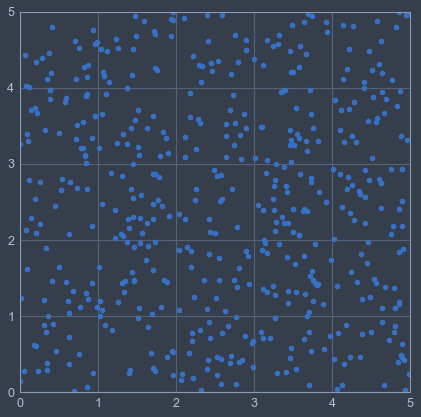

In [5]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

ax.plot(samples[:,0],samples[:,1],'o',color='b') # array[:,n] nth row datas
ax.set_ylim(0,5)
ax.set_xlim(0,5)

plt.show()

In [10]:
samples[:,0]

array([2.75398951e+00, 1.45452369e+00, 4.46473477e+00, 6.27926552e-01,
       2.57336017e-01, 1.49381054e-01, 3.24572024e+00, 3.38127451e+00,
       1.19909412e-01, 1.29626223e+00, 1.41762541e+00, 2.20226859e+00,
       2.72324509e+00, 1.53181766e+00, 1.93985629e+00, 4.87997711e+00,
       4.51417054e+00, 1.88997021e+00, 3.26705451e+00, 1.80782382e+00,
       2.03259958e+00, 1.34617789e+00, 2.28843200e+00, 2.93126452e+00,
       1.38988753e+00, 1.02705172e+00, 2.57017530e+00, 2.41792766e+00,
       3.53843311e+00, 3.45546461e+00, 1.86800062e+00, 1.69924332e+00,
       1.62903579e+00, 3.07644654e-01, 4.85801303e+00, 3.45738755e+00,
       3.61969570e+00, 2.98331887e+00, 3.62810689e-01, 7.59304985e-01,
       6.46469323e-01, 9.39074125e-01, 3.40805889e+00, 3.53590300e+00,
       4.63362842e+00, 3.63159749e+00, 4.21051593e+00, 3.30162953e+00,
       3.16832782e+00, 2.76422287e+00, 9.60361482e-01, 3.92468352e+00,
       4.25485709e+00, 4.48954348e-01, 4.63968174e+00, 2.42547113e+00,
      

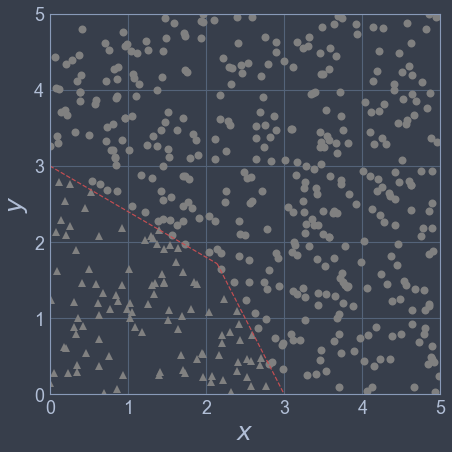

In [17]:
def plot_boundary(X, model, ax):
    # meshgrid를 짜서 Model에 포워드 시키기
    # 뉴럴 네트웍 모델 자체가 함수이므로 (x,y)->z를 하는 것이다.
    x = np.linspace(min(X[:,0]), max(X[:,0]))
    y = np.linspace(min(X[:,1]), max(X[:,1]))
    
    xx, yy = np.meshgrid(x, y)
    grid_tensor = torch.Tensor(np.c_[xx.flatten(), yy.flatten()])
    zz = model.forward(grid_tensor).detach().numpy().reshape(xx.shape)
    ax.contour(xx, yy, zz, cmap='gray', levels=[0.5])

def logistic(x):
    return 1 / (1+np.exp(-x))

dcs_bnd_1 = lambda x: -(3/5)*x + 3
dcs_bnd_1_imp = lambda x, y: (3)*x + (5)*y + (-15)

dcs_bnd_2 = lambda x: -2*x + 6
dcs_bnd_2_imp = lambda x, y: (-6)*x + (-3)*y + (18)

y1_bin = dcs_bnd_1_imp(samples[:,0], samples[:,1]) > 0
y2_bin = dcs_bnd_2_imp(samples[:,0], samples[:,1]) < 0
positive_where = np.where((y1_bin | y2_bin))[0]
target = np.zeros(N)
target[positive_where] = 1

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)

ax.plot(samples[np.where(target==1)[0],0], samples[np.where(target==1)[0],1], 'o', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)
ax.plot(samples[np.where(target==0)[0],0], samples[np.where(target==0)[0],1], '^', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)

x1 = np.linspace(0, 15/7, 50)
x2 = np.linspace(15/7, 3, 50)

ax.plot(x1, dcs_bnd_1(x1), '--', color='r')
ax.plot(x2, dcs_bnd_2(x2), '--', color='r')

ax.set_ylim(0,5)
ax.set_xlim(0,5)
    
plt.show()

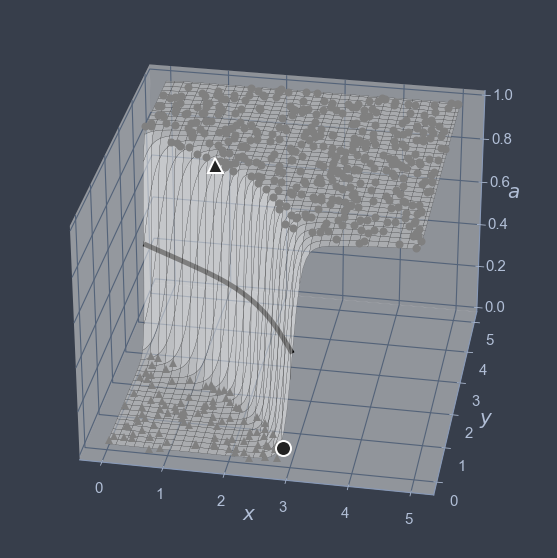

In [22]:
pred = o(samples[:,0], samples[:,1])
pred_pos = pred >= 0.5
pred_neg = pred < 0.5
xx, yy = np.meshgrid(x, x)

a, b, c = 10, -9, 4
o = lambda x, y: logistic( a*logistic(dcs_bnd_1_imp(x, y)) + b*logistic(dcs_bnd_2_imp(x, y)) + c )

# for positive samples
TP = np.logical_and(target==1, pred_pos)
FN = np.logical_and(target==1, pred_neg)

# for negative samples
TN = np.logical_and(target==0, pred_neg)
FP = np.logical_and(target==0, pred_pos)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

x1 = np.linspace(0, 5, 101)
x2 = np.linspace(0, 5, 101)

X1, X2 = np.meshgrid(x1, x2)

ax.contour(X1, X2, o(X1, X2), linewidths=5, cmap='gray', levels=[0.5])
ax.plot_surface(X1, X2, o(X1, X2), color='w', edgecolor='k', alpha=0.5)

ax.plot3D(samples[TP,0], samples[TP,1], 1.0, 'o', 
        markerfacecolor='gray', markeredgecolor='k', markersize=8, zorder=10)

ax.plot3D(samples[TN,0], samples[TN,1], 0.0, '^', 
        markerfacecolor='gray', markeredgecolor='k', markersize=8, zorder=10)

ax.plot3D(samples[FN,0], samples[FN,1], 0.0, 'o', 
        markerfacecolor='k', markeredgecolor='w', markeredgewidth=2, markersize=15, zorder=10)
ax.plot3D(samples[FP,0], samples[FP,1], 1.0, '^', 
        markerfacecolor='k', markeredgecolor='w', markeredgewidth=2, markersize=15, zorder=10)

ax.xaxis.set_tick_params(labelsize=15) 
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$y$', fontsize=20)
ax.set_zlabel(r'$a$', fontsize=20)
ax.view_init(30, -80)

plt.show()

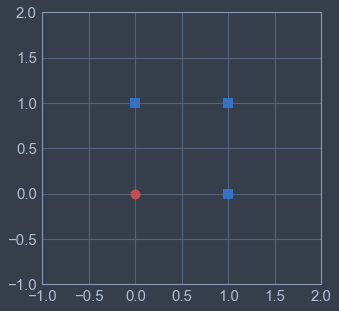

In [26]:
# perceptron example : OR Gate
plt.rcParams["figure.figsize"] = (5,5)

plt.plot([0],[0],'o',markersize=10,color='r')
plt.plot([1,0,1],[0,1,1],'s',markersize=10,color='b')
plt.xlim([-1,2])
plt.ylim([-1,2])
plt.show()

In [32]:
# make input matrix
X = np.array([0,0,1,0,0,1,1,1]).reshape(4,2)

# 각 입력 타겟을 col vector로 만든다.
T = np.array([0,1,1,1]).reshape(-1,1)
print(f"Input is\n {X} shape : {X.shape}")
print(f"Target is\n {T} shape : {T.shape}")

Input is
 [[0 0]
 [1 0]
 [0 1]
 [1 1]] shape : (4, 2)
Target is
 [[0]
 [1]
 [1]
 [1]] shape : (4, 1)


In [33]:
np.random.seed(0)
W_hsty = []
W = -np.random.rand(2).reshape(1,2)
Y = np.where(np.dot(W,X.T).T>0,1,0) #forward

# 최초 초기상태를 출력한다.
print(f"UPDATE 0 : W={W[0][0]}, {W[0][1]}, Y = {Y[0][0]},{Y[1][0]},{Y[2][0]},{Y[3][0]}")

# 10번 반복한다.
for i in range(10):
    #eta는 반복이 좀 되면서 수렴하게 만들기 위해 작은 값으로 설정.
    W += 0.1*np.dot((T-Y).T,X)
    W_hsty.append(W.copy())
    Y = np.where(np.dot(W,X.T).T > 0, 1, 0) #forward
    print(f"UPDATE {i+1} : W={W[0][0]}, {W[0][1]}, Y = {Y[0][0]},{Y[1][0]},{Y[2][0]},{Y[3][0]}")
    
    if (T-Y).sum() == 0 : break

UPDATE 0 : W=-0.5488135039273248, -0.7151893663724195, Y = 0,0,0,0
UPDATE 1 : W=-0.34881350392732474, -0.5151893663724194, Y = 0,0,0,0
UPDATE 2 : W=-0.14881350392732473, -0.3151893663724194, Y = 0,0,0,0
UPDATE 3 : W=0.05118649607267528, -0.11518936637241939, Y = 0,1,0,0
UPDATE 4 : W=0.15118649607267529, 0.08481063362758062, Y = 0,1,1,1


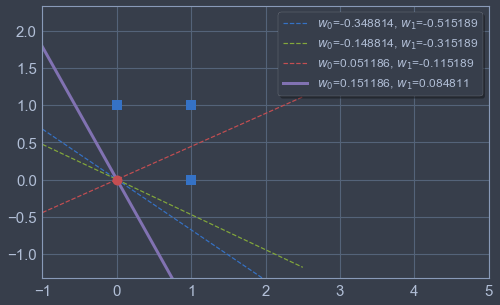

In [35]:
plt.rcParams["figure.figsize"] = (8,5)

x = np.arange(-1, 3, 0.5)

y1 = (-W_hsty[0][0][0])/W_hsty[0][0][1] * x 
y2 = (-W_hsty[1][0][0])/W_hsty[1][0][1] * x
y3 = (-W_hsty[2][0][0])/W_hsty[2][0][1] * x
y4 = (-W_hsty[3][0][0])/W_hsty[3][0][1] * x

plt.plot(x, y1, '--', label=r"$w_0$={:f}, $w_1$={:f}".format(W_hsty[0][0][0], W_hsty[0][0][1])) 
plt.plot(x, y2, '--', label=r"$w_0$={:f}, $w_1$={:f}".format(W_hsty[1][0][0], W_hsty[1][0][1])) 
plt.plot(x, y3, '--', label=r"$w_0$={:f}, $w_1$={:f}".format(W_hsty[2][0][0], W_hsty[2][0][1]))  
plt.plot(x, y4, lw=3, label=r"$w_0$={:f}, $w_1$={:f}".format(W_hsty[3][0][0], W_hsty[3][0][1])) 

plt.plot([0],[0],'o',markersize=10,color='r')
plt.plot([1,0,1],[0,1,1],'s',markersize=10,color='b')
plt.axis('equal')
plt.axis([-1, 5, -0.5, 1.5])
legend = plt.legend(loc='upper right', shadow=True, fontsize=12)

plt.show()